# Template for the House Price Forecasting: Kaggle.com Machine Learning Competition

## 7 Steps of ML Projects
The 7 Steps below are universal to the majority of Machine Learning / Data Science projects, so this structure can be carried forward to other projects:
1. Frame the Problem and Ideate Potential Solutions
2. Acquire the Data
3. Exploratory Data Analysis (EDA)
4. Data Wrangling and Feature Engineering
5. Select and Train an ML Algorithm Model
6. Evaluate Results and Fine-Tune Your Model
7. Launch, Monitor, and Maintain Your System

# Step 1: Frame The Problem and Ideate Potential Solutions

## Project Overview

#### Description from Kaggle 
[https://www.kaggle.com/c/house-prices-advanced-regression-techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

**Start here if...**
You have some experience with R or Python and machine learning basics. This is a perfect competition for data science students who have completed an online course in machine learning and are looking to expand their skill set before trying a featured competition. 

**Competition Description**
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

**Practice Skills**
- Creative feature engineering 
- Advanced regression techniques like random forest and gradient boosting

**Acknowledgments**
The [Ames Housing dataset](http://www.amstat.org/publications/jse/v19n3/decock.pdf) was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

## Frame the Problem and Ideate Potential Solutions

This looks to be a pretty straightforward challenge.  Similar to the Titanic challenge, this falls under the supervised learning branch of ML, since we will be using data with known house prices to predict unknown house prices.

**Examples of supervised learning ML algorithms that coule be used are:**
- Linear Regression
- Logistic Regression
- k-Nearest Neighbors
- Support Vector Machines (SVM)
- Decision Trees and Random Forests
- Neural Networks

At first glance, intuition tells me that Linear Regression or Decision Trees / Random Foresets will provide the best results but will withhold judgment until the model is chosen in a future step.

# Step 2: Acquire the Data

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Download the Datasets

Download and unzip the datasets from the [data tab of the Kaggle house price competition page](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).  
Then put the 4 files in a subfolder named `Datasets`

## First submission to Kaggle.com (benchmark)
Kaggle provides a pre-made sample submission file called `sample_submission` that shows the proper format of the file you will need to submit later to see your results.  These sample submission files are perfect for testing the Kaggle upload process, and to also set an early benchmark to guage your prediction skills against.

#### Upload and submit the sample_submission
- Go to the [House Price Kaggle web page]() and click the `Submit Predictions` button.  
- Either drag the file onto the page or click the upload icon and select the file
- Write a brief description (e.g. sample_submission benchmark upload), then click make submission

#### Confirm the upload worked and check your score
You should see a score on the sample submission of 0.40890.  

This Kaggle competition is ranked by logarithmic Root Mean Squared Error (RSME), where obviously lower is better.  Getting a perfect score is near impossible, and if you did you're either very lucky or quite possibly cheated.  
So, with this score being about 0.41 RMSE, that gives us a room for improvement to get closer to zero, and should be less difficult to beat than the Titanic benchmark was.

## Import the Datasets

### 2A) import test.csv to `test` dataframe and run head() to make sure it loaded properly

In [2]:
test = pd.read_csv("Datasets/test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 2A) import train.csv to `train` dataframe and run head() to make sure it loaded properly

In [3]:
train = pd.read_csv("Datasets/train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 2C) Make the `Id` column the index for both dataframes

In [4]:
train.set_index('Id', inplace=True)
test.set_index('Id', inplace=True)

## Combine the train and test files into `combined` dataframe for improved EDA

Note that train has a column for `SalePrice` but test does not (since that's what we will be predicting in this project).  
Ensure that the combined dataframe maintains this column but will have null values for the data taken from test.     

### 2D) create a `combined` dataframe that combines/merges/concatenates/appends train and test. Then run head and tail to ensure it worked

In [5]:
combined = pd.concat([train, test], axis=0, sort=False)
combined.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [6]:
combined.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


# Step 3: Exploratory Data Analysis (EDA)

*First, read the `data_description.txt` file to get a better understanding of each of the features within the dataset*

### 3A) Run .info on `combined` to see the data types, missing values, and potential data wrangling needed

In [7]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non

*Note that there are quite a lot of features here (80 columns), with a mix of numerical (int, float) and categorical (object).*

*Categorical variables pose a unique challenge in Machine Learning, and they will need to be encoded so that the ML algorithm that we choose properly handles them.  Which encoder to use is a topic in itself, so for now just make a mental note that we will need to encode the categorical variables in Step 4: Data Wrangling and Feature Engineering*

### 3B-1) Since `SalePrice` is our target variable for this challenge, the first step is to examie that.  Run a histogram/distplot on `SalePrice` (reminder that only `train` dataFrame has this)

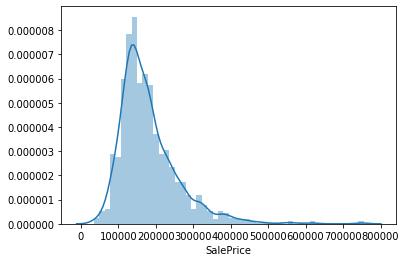

In [8]:
sns.distplot(train.SalePrice, bins=50)

*Note that it's not a standard bell curve, and there are some tail outliers that we will need to take into account*

### 3B-2) Let's check the skewness (lean) and kurtosis (fat tail) of SalePrice vs a normal binomial distribution (value of 0 for both)

In [9]:
train.SalePrice.skew()

1.8828757597682129

In [10]:
train.SalePrice.kurt()

6.536281860064529

### 3C) Check the unique value counts of items in the `MSSubClass` column, and copy/paste the code and matching descriptions from the `data_description.txt` file

In [11]:
combined.MSSubClass.value_counts()

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

**Top 3:**  
        20 = 1-STORY 1946 & NEWER ALL STYLES  
        60 = 2-STORY 1946 & NEWER  
        50 = 1-1/2 STORY FINISHED ALL AGES  

*Now we know that even though `MSSubClass` is a int64 type, it is actually a categorical variable (nominal with relatively low cardinality).  This will come into play during Step 4: Data Wrangling and Feature Engineering.*

### To facilitate our EDA and future data wrangling, let's create a DataFrame that categorizes each of the 80 features by data type.  
#### For clarity and simplicity I'll provide the code for this below.

In [12]:
features = combined.columns.to_frame()
features['Type'] = combined.dtypes
#features.reset_index(inplace=True)     # uncomment this if you want to get rid of the duplicate index/Feature column
#features.drop(0, axis=1, inplace=True) # uncomment this if you want to get rid of the duplicate index/Feature column
features.columns = ['Feature', 'Type']
features['Type2'] = features['Type'].apply(lambda x: 'categorical' if x=='object' else 'numerical')
features

,Feature,Type,Type2
MSSubClass,MSSubClass,int64,numerical
MSZoning,MSZoning,object,categorical
LotFrontage,LotFrontage,float64,numerical
LotArea,LotArea,int64,numerical
Street,Street,object,categorical
...,...,...,...
MoSold,MoSold,int64,numerical
YrSold,YrSold,int64,numerical
SaleType,SaleType,object,categorical
SaleCondition,SaleCondition,object,categorical


In [13]:
# Changing MSSubClass to categorical despite being an int64 dtype
features.loc['MSSubClass','Type2']='categorical'

In [14]:
features.Type2.value_counts()

categorical    44
numerical      36
Name: Type2, dtype: int64

In [15]:
# create lists of column names for both categorical and numerical
filter_cat = features[features['Type2']=='categorical'].index
filter_cat = list(filter_cat)
filter_num = features[features['Type2']=='numerical'].index
filter_num = list(filter_num)

### 3D) Create a DF called `corr` which is the correlation of all *numerical* variables, then plot a heatmap (train DF only)

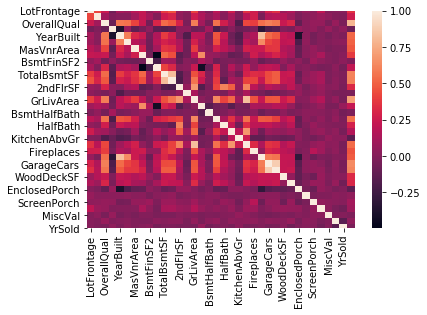

In [16]:
corr = train[filter_num].corr()
sns.heatmap(corr)

### 3E) Create a dataFrame called `corr_SP` that isolates the correlations of all features vs SalePrice.  Sort inplace by largest positive to largest negative, then plot on a barplot (size 13,5)  
*Remember to drop SalePrice since it perfectly correlates with itself*

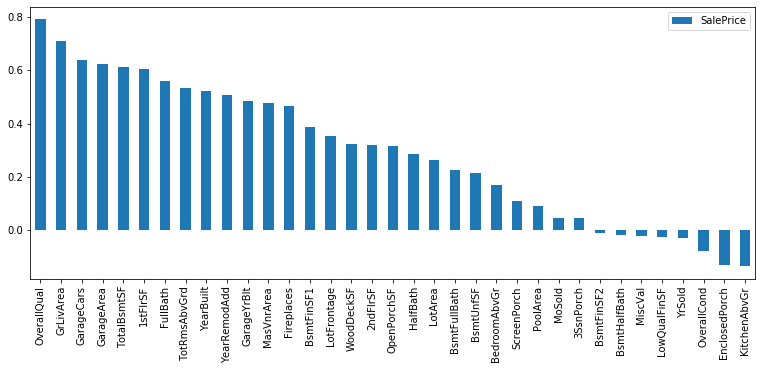

In [17]:
corr_SP = corr.SalePrice.to_frame()
corr_SP.drop('SalePrice', axis=0, inplace=True)
corr_SP.sort_values(by='SalePrice', ascending=False, inplace=True)
corr_SP.plot.bar(figsize=(13,5))

*OverallQual has the strongest positive correlation with Sale Price.  Let's examine this closer*

### 3F) Create a box plot of `OverallQual` vs `SalePrice`

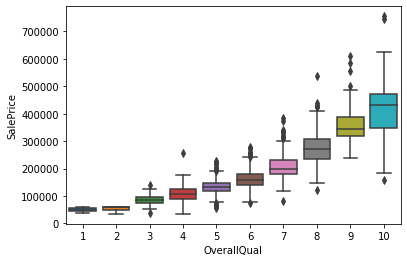

In [18]:
sns.boxplot(x=train.OverallQual, y=train.SalePrice)

*Since OverallQual is a rank from 1 to 10, this spread makes sense despite a few outliers (esp in the 10 rank)*

### 3G-1) Use seaborn to create a linear regression plot (lmplot) of `GrLivArea` vs `SalePrice` with order=1

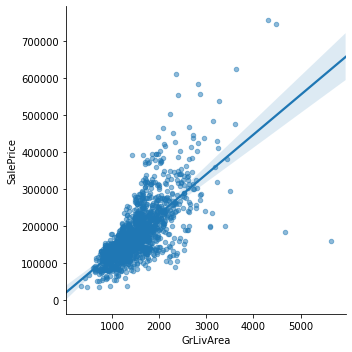

In [19]:
    sns.lmplot(x='GrLivArea', y='SalePrice', data=train, order=1, scatter_kws={"s": 20, "alpha": .5})

*Looks somewhat accurate, but closer to exponential than linear.  Let's run again with order=2*

### 3G-2) Run the same linear regression but with order=2

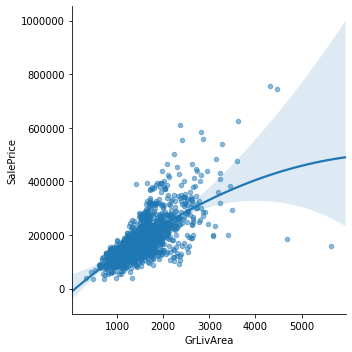

In [20]:
sns.lmplot(x='GrLivArea', y='SalePrice', data=train, order=2, scatter_kws={"s": 20, "alpha": .5})

*There are 2 outliers > 4500 GrLivArea that are causing problems.  Let's make a note to look into those in step 4*

### 3I) To speed things up, let's make a pair plot of the top 8 from corr_SP + SalePrice (9 columns)

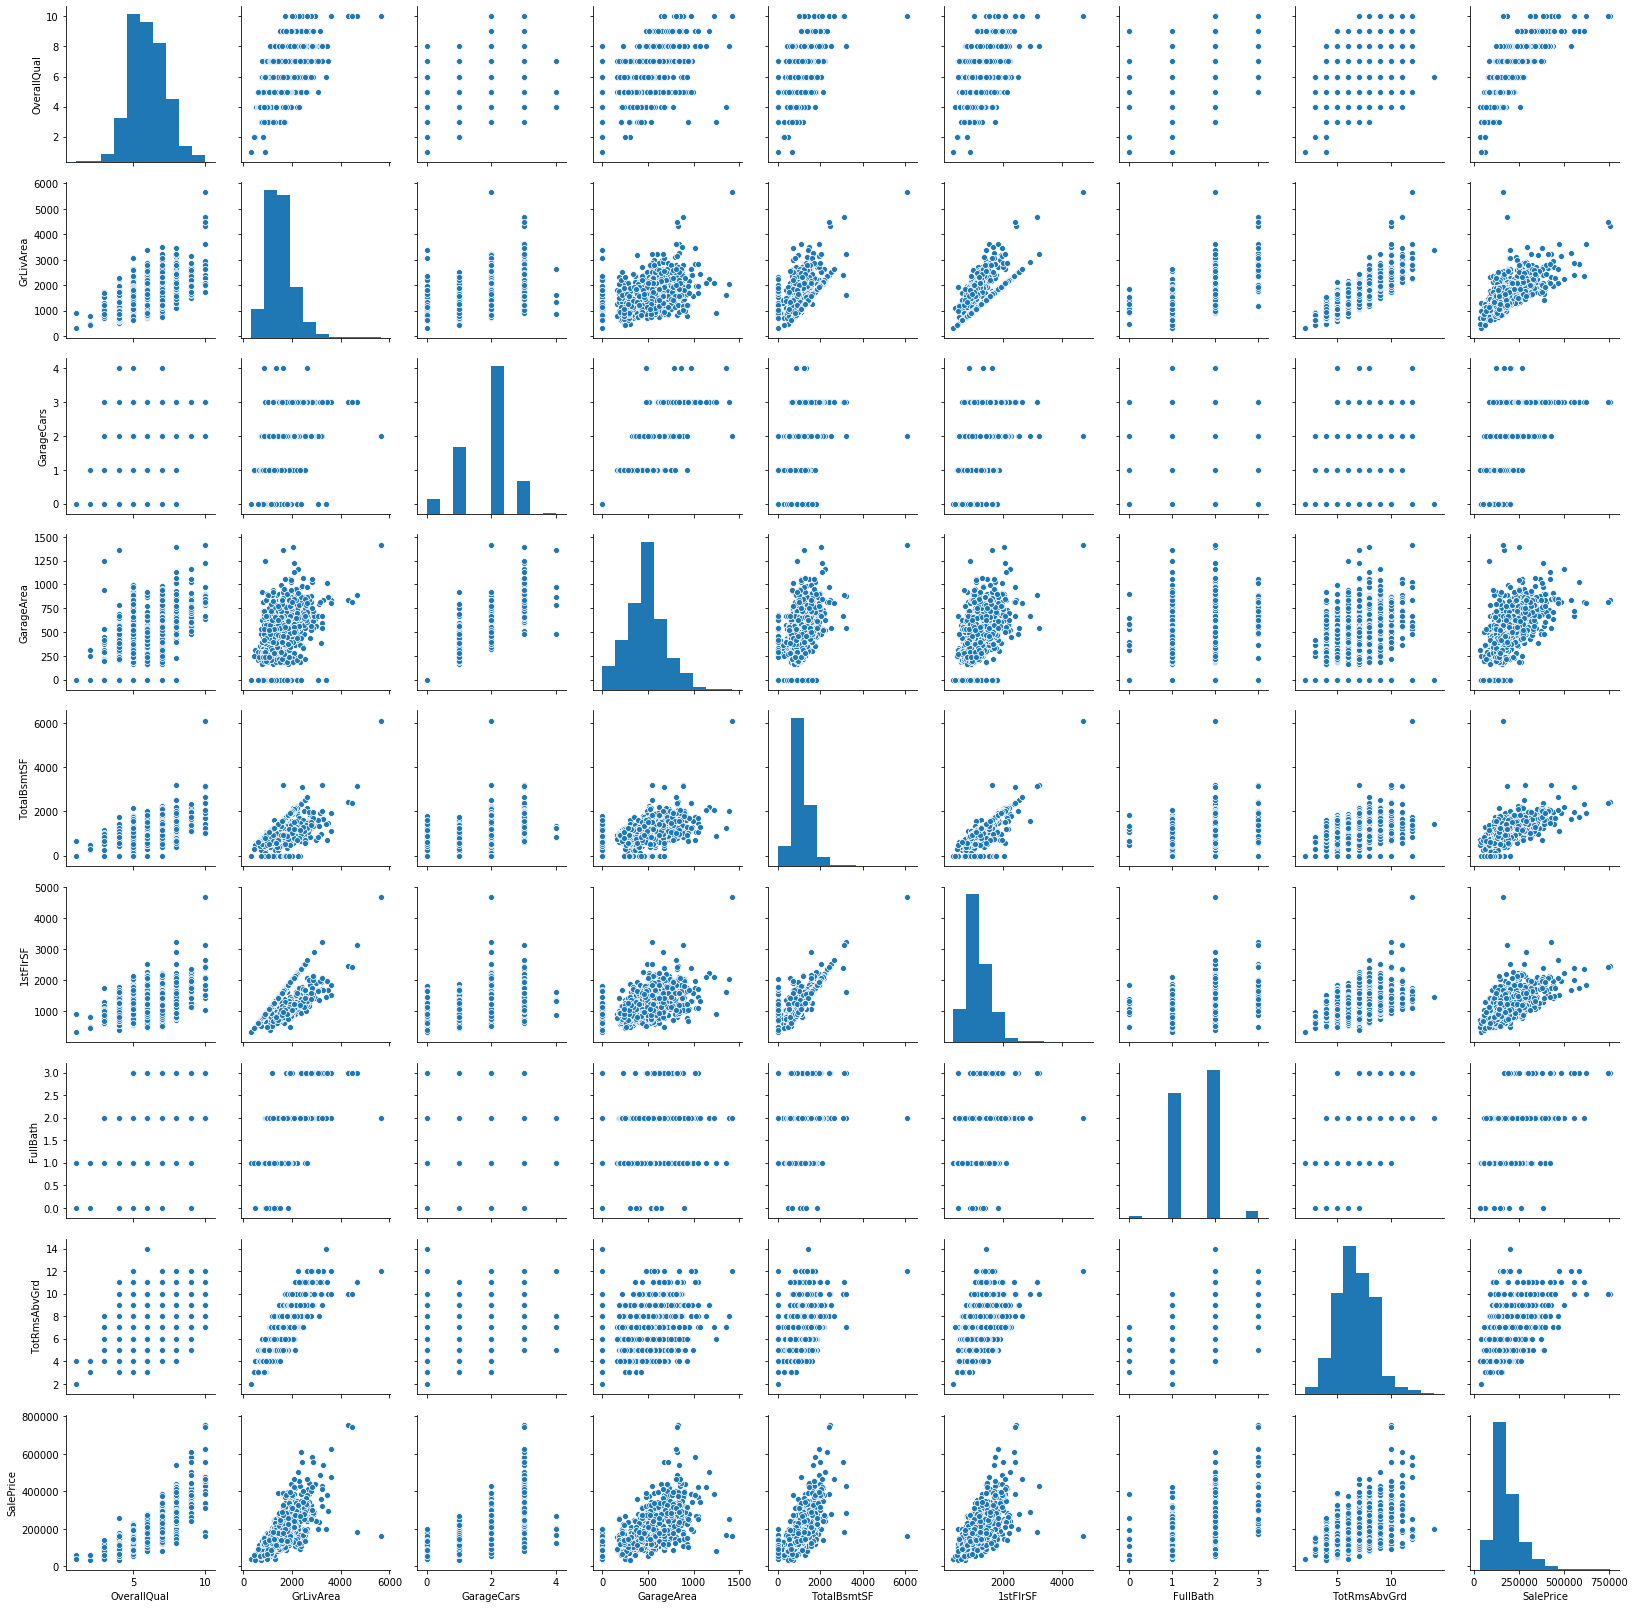

In [21]:
top8 = corr_SP.head(8).index.to_list()
top8.append('SalePrice')
sns.pairplot(train[top8])

*That's a solid level of EDA for the moment, covering the most important items.  Feel free to come back later and explore the other columns in more detail.  Now on to the meat and potatoes: Data Wrangling and Feature engineering.*

# Step 4: Data Wrangling and Feature Engineering

*Looking at the SalePrice row of the pair plot we just made, the GarageCars=4 are can be merged with the =3 column to make the relationship with SalePrice a bit more clean.  Going forward, `3` will represent `3+`*

### 4A) Change all Garage Cars (in both train and test) of 4 or more to equal 3

In [22]:
train['GarageCars'].apply(lambda x: 3 if x>3 else x)
test['GarageCars'].apply(lambda x: 3 if x>3 else x)

Id
1461    1.0
1462    1.0
1463    2.0
1464    2.0
1465    2.0
       ... 
2915    0.0
2916    1.0
2917    2.0
2918    0.0
2919    3.0
Name: GarageCars, Length: 1459, dtype: float64

### 4B-1) Create a DF or List called `missing` that calculates the percent of missing values for all features in `combined`, sorted by most to least.  For simplicity, drop any features from `missing` that don't have any missing values to keep the list small and manageable.

*Remember to ignore that SalePrice has about 50% missing values since half of combined is from the test dataset*

In [23]:
missing = (combined.isnull().sum() / len(combined)).sort_values(ascending=False)
missing = missing[missing>0]
missing.drop('SalePrice', inplace=True)
missing

PoolQC          0.996574
MiscFeature     0.964029
Alley           0.932169
Fence           0.804385
FireplaceQu     0.486468
LotFrontage     0.166495
GarageCond      0.054471
GarageYrBlt     0.054471
GarageQual      0.054471
GarageFinish    0.054471
GarageType      0.053786
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtQual        0.027749
BsmtFinType2    0.027407
BsmtFinType1    0.027064
MasVnrType      0.008222
MasVnrArea      0.007879
MSZoning        0.001370
Utilities       0.000685
Functional      0.000685
BsmtFullBath    0.000685
BsmtHalfBath    0.000685
GarageCars      0.000343
BsmtFinSF2      0.000343
Exterior2nd     0.000343
GarageArea      0.000343
TotalBsmtSF     0.000343
BsmtUnfSF       0.000343
BsmtFinSF1      0.000343
Exterior1st     0.000343
KitchenQual     0.000343
SaleType        0.000343
Electrical      0.000343
dtype: float64

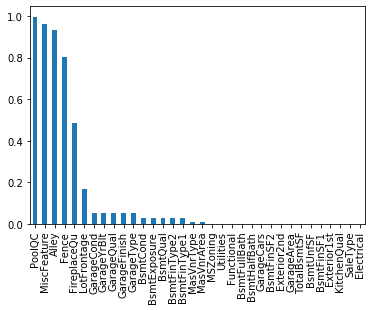

In [24]:
missing.plot.bar()

### 4C) Drop all columns from `train`, `test`, `combined`, and `missing` that have >= 45% missing data

*Again, remember not to drop SalePrice!*

In [25]:
to_drop = missing[missing >= .45].index.to_list()
to_drop

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

In [26]:
train = train.drop(to_drop, axis=1)

In [27]:
test = test.drop(to_drop, axis=1)

In [28]:
combined = combined.drop(to_drop, axis=1)

In [29]:
missing = missing.drop(to_drop)

In [35]:
missing

LotFrontage     0.166495
GarageCond      0.054471
GarageYrBlt     0.054471
GarageQual      0.054471
GarageFinish    0.054471
GarageType      0.053786
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtQual        0.027749
BsmtFinType2    0.027407
BsmtFinType1    0.027064
MasVnrType      0.008222
MasVnrArea      0.007879
MSZoning        0.001370
Utilities       0.000685
Functional      0.000685
BsmtFullBath    0.000685
BsmtHalfBath    0.000685
GarageCars      0.000343
BsmtFinSF2      0.000343
Exterior2nd     0.000343
GarageArea      0.000343
TotalBsmtSF     0.000343
BsmtUnfSF       0.000343
BsmtFinSF1      0.000343
Exterior1st     0.000343
KitchenQual     0.000343
SaleType        0.000343
Electrical      0.000343
dtype: float64

### 4D-1) Let's look into LotFrontage to clean up those 16.6% missing values.  Display a barchart / distplot on combined LotFrontage with bins=50

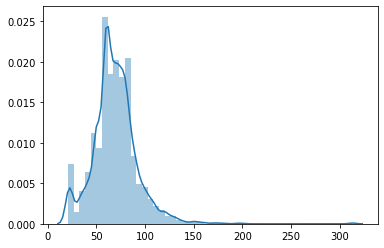

In [43]:
sns.distplot(combined['LotFrontage'].to_list(), bins=50)

### 4D-2) Calculate the correlation of LotFrontage against all other variables and display the data, sorted from most to least

*Reminder that we already created the `corr` DF earlier*

In [48]:
corr['LotFrontage'].sort_values(ascending=False)

LotFrontage      1.000000
1stFlrSF         0.457181
LotArea          0.426095
GrLivArea        0.402797
TotalBsmtSF      0.392075
TotRmsAbvGrd     0.352096
SalePrice        0.351799
GarageArea       0.344997
GarageCars       0.285691
Fireplaces       0.266639
BedroomAbvGr     0.263170
OverallQual      0.251646
BsmtFinSF1       0.233633
PoolArea         0.206167
FullBath         0.198769
MasVnrArea       0.193458
OpenPorchSF      0.151972
BsmtUnfSF        0.132644
YearBuilt        0.123349
BsmtFullBath     0.100949
YearRemodAdd     0.088866
WoodDeckSF       0.088521
2ndFlrSF         0.080177
GarageYrBlt      0.070250
3SsnPorch        0.070029
HalfBath         0.053532
BsmtFinSF2       0.049900
ScreenPorch      0.041383
LowQualFinSF     0.038469
MoSold           0.011200
EnclosedPorch    0.010700
YrSold           0.007450
MiscVal          0.003368
KitchenAbvGr    -0.006069
BsmtHalfBath    -0.007234
OverallCond     -0.059213
Name: LotFrontage, dtype: float64

*Looks like we have a semi-strong positive correlation with `1stFlSF` and `LotArea`.  LotArea has the closer relationship (feel free to confirm), so let's use that to fill in the blanks.*

### 4D-3) Use seaborn to show a linear regression of `LotFrontage` on x axis vs `LotArea` on y axis.  The slope of this line is what we'll be using as the factor to fill in missing values

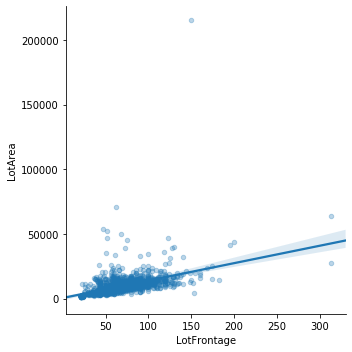

In [54]:
sns.lmplot(x='LotFrontage', y='LotArea', data=combined, scatter_kws={"s": 20, "alpha": .3})

**Let's use sklearn to calculate the regression line of this relationship and use that to fill in the blanks.  I'll code this part out explicitly here for clarity**

In [71]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
X = combined.dropna(subset=['LotFrontage'])['LotFrontage'].values.reshape(-1,1)
Y = combined.dropna(subset=['LotFrontage'])['LotArea'].values.reshape(-1,1)
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
# get the y intercept
lr.intercept_

array([380.64082544])

In [73]:
# get the slope of the regression line
lr.coef_

array([[134.84574799]])

*So with this info we can now calculate the missing values with this simple formula: `380.64 + 134.846 * LotArea`*

### 4D-4) Fill in the missing values on LotFrontage in the train, test, and combined datasets using the formula `lr.intercept_ + lr.coef_ * LotArea`

# Step 5: Select and Train an ML Algorithm Model

# Step 6: Evaluate Results and Fine-Tune Your Model

# Step 7: Launch, Monitor, and Maintain Your System